In [24]:
# importing library
import pandas as pd  # pandas is access the dataframe
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rfc, GradientBoostingClassifier as gbc

from sklearn. metrics import confusion_matrix, accuracy_score, classification_report,f1_score
from sklearn. metrics import  precision_score, recall_score,roc_curve, roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

# DATA COLLECTION AND PREPROCESSING

In [131]:
# reading csv file as the pandas dataframe
dataset = pd.read_csv("cancer.csv")

In [132]:
# shuffled the data set
dataset = shuffle(dataset, random_state=11)

In [133]:
# spliting the data set for testing at deploy stage
data = dataset.iloc[10:,:]
data.shape

(559, 33)

In [170]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [134]:
# validation dataset for tesing the model
valdata = dataset.iloc[0:10,:]
valdata.head(11)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
198,877486,M,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.067720,...,32.06,166.40,1688.0,0.1322,0.5601,0.38650,0.17080,0.3193,0.09221,NaN
162,871201,M,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.128600,...,26.39,174.90,2232.0,0.1438,0.3846,0.68100,0.22470,0.3643,0.09223,NaN
70,859575,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.079510,...,26.58,165.90,1866.0,0.1193,0.2336,0.26870,0.17890,0.2551,0.06589,NaN
393,903516,M,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.156200,...,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070,NaN
56,857637,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.089940,...,28.14,170.10,2145.0,0.1624,0.3511,0.38790,0.20910,0.3537,0.08294,NaN
136,868223,B,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.026000,...,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343,NaN
146,869691,M,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300,NaN
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083,NaN
183,873843,B,11.41,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.023610,...,17.70,79.12,467.2,0.1121,0.1610,0.16480,0.06296,0.1811,0.07427,NaN
395,903811,B,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,...,25.34,96.42,684.5,0.1066,0.1231,0.08460,0.07911,0.2523,0.06609,NaN


In [135]:
# check the dataset has balanced 
data.groupby('diagnosis').size()

diagnosis
B    353
M    206
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

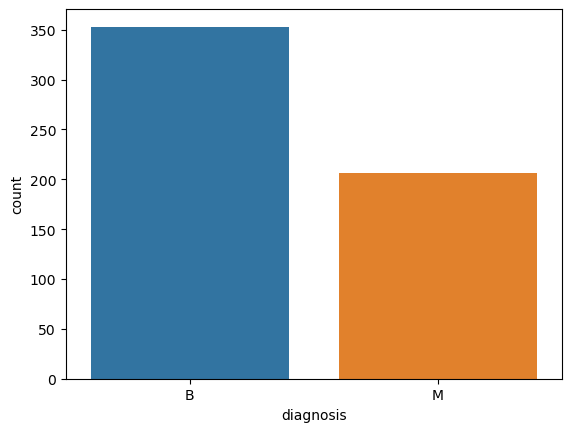

In [30]:
# visualize the count for each classification
sns.countplot(data['diagnosis'])

# above B has 63% values and M has 37% so unbalaced dataset so sampling the dataset


In [31]:
# group by the data with target and analysing the mean
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.683456e+07,12.144671,17.926062,78.068725,462.708499,0.092506,0.080272,0.046205,0.025752,0.174544,...,23.510765,87.005326,558.827479,0.125031,0.183263,0.166991,0.074544,0.270780,0.079508,NaN
M,3.786499e+07,17.435874,21.654660,115.178495,975.401942,0.102893,0.144962,0.160363,0.087659,0.192638,...,29.355194,140.918835,1412.237864,0.144955,0.373555,0.449750,0.181661,0.321954,0.091589,NaN


# We can clearly see that for most of the features, the mean values are higher for Malignant(1) cases and lower for Benign(0) cases

In [136]:
# Drop the unnecessary columns
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [33]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,14.094560,19.300107,91.744240,651.643828,0.096334,0.104111,0.088274,0.048566,0.181212,0.062830,...,16.210821,25.664526,106.873274,873.322182,0.132373,0.253389,0.271192,0.114018,0.289638,0.083960
std,3.508839,4.326366,24.195303,350.447273,0.014089,0.052807,0.079467,0.038582,0.027096,0.007084,...,4.789020,6.183173,33.322373,563.373063,0.022932,0.156989,0.208174,0.065503,0.060519,0.018142
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.685000,16.165000,75.100000,419.250000,0.086390,0.065090,0.029520,0.020290,0.162000,0.057750,...,12.995000,21.045000,84.035000,513.950000,0.116600,0.147450,0.115450,0.064530,0.250300,0.071365
50%,13.340000,18.870000,86.180000,546.400000,0.095870,0.092420,0.060150,0.033410,0.179300,0.061610,...,14.970000,25.260000,97.660000,686.500000,0.131300,0.211800,0.226400,0.099750,0.281900,0.079990
75%,15.750000,21.805000,103.700000,777.250000,0.105200,0.130350,0.128250,0.072020,0.195650,0.066180,...,18.550000,29.880000,124.950000,1047.000000,0.146050,0.333800,0.379500,0.160800,0.317450,0.092045
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# from describe fun  we note that the mean values greater than 50 percentiles (median)  so most of the values slightly are right skewed 

In [34]:
data.skew()

radius_mean                0.962554
texture_mean               0.644747
perimeter_mean             1.011462
area_mean                  1.686674
smoothness_mean            0.462639
compactness_mean           1.207838
concavity_mean             1.420631
concave points_mean        1.185254
symmetry_mean              0.732554
fractal_dimension_mean     1.300192
radius_se                  3.121613
texture_se                 1.648836
perimeter_se               3.470833
area_se                    5.501421
smoothness_se              2.294110
compactness_se             1.901533
concavity_se               5.102079
concave points_se          1.455149
symmetry_se                2.161028
fractal_dimension_se       3.902015
radius_worst               1.126141
texture_worst              0.505956
perimeter_worst            1.154782
area_worst                 1.916827
smoothness_worst           0.415824
compactness_worst          1.499335
concavity_worst            1.166228
concave points_worst       0

In [35]:
# checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 294 to 80
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                559 non-null    object 
 1   radius_mean              559 non-null    float64
 2   texture_mean             559 non-null    float64
 3   perimeter_mean           559 non-null    float64
 4   area_mean                559 non-null    float64
 5   smoothness_mean          559 non-null    float64
 6   compactness_mean         559 non-null    float64
 7   concavity_mean           559 non-null    float64
 8   concave points_mean      559 non-null    float64
 9   symmetry_mean            559 non-null    float64
 10  fractal_dimension_mean   559 non-null    float64
 11  radius_se                559 non-null    float64
 12  texture_se               559 non-null    float64
 13  perimeter_se             559 non-null    float64
 14  area_se                  

In [36]:
# checking for missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# no null values so here no need of missing values and one categorical object data type is present so encoding is needed

In [137]:
# Let's encode target column B  'Benign' as 0[not harmful] M 'Malignant' as 1[harmful]
diagnosis_dict = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_dict)

In [38]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
294,0,12.720,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,...,13.500,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
184,1,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.800,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772
377,0,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,...,14.690,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061
539,0,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.33930,0.05000,0.2790,0.10660
296,0,10.910,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,...,11.370,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643


# DATA VISUALIZATION

<AxesSubplot:>

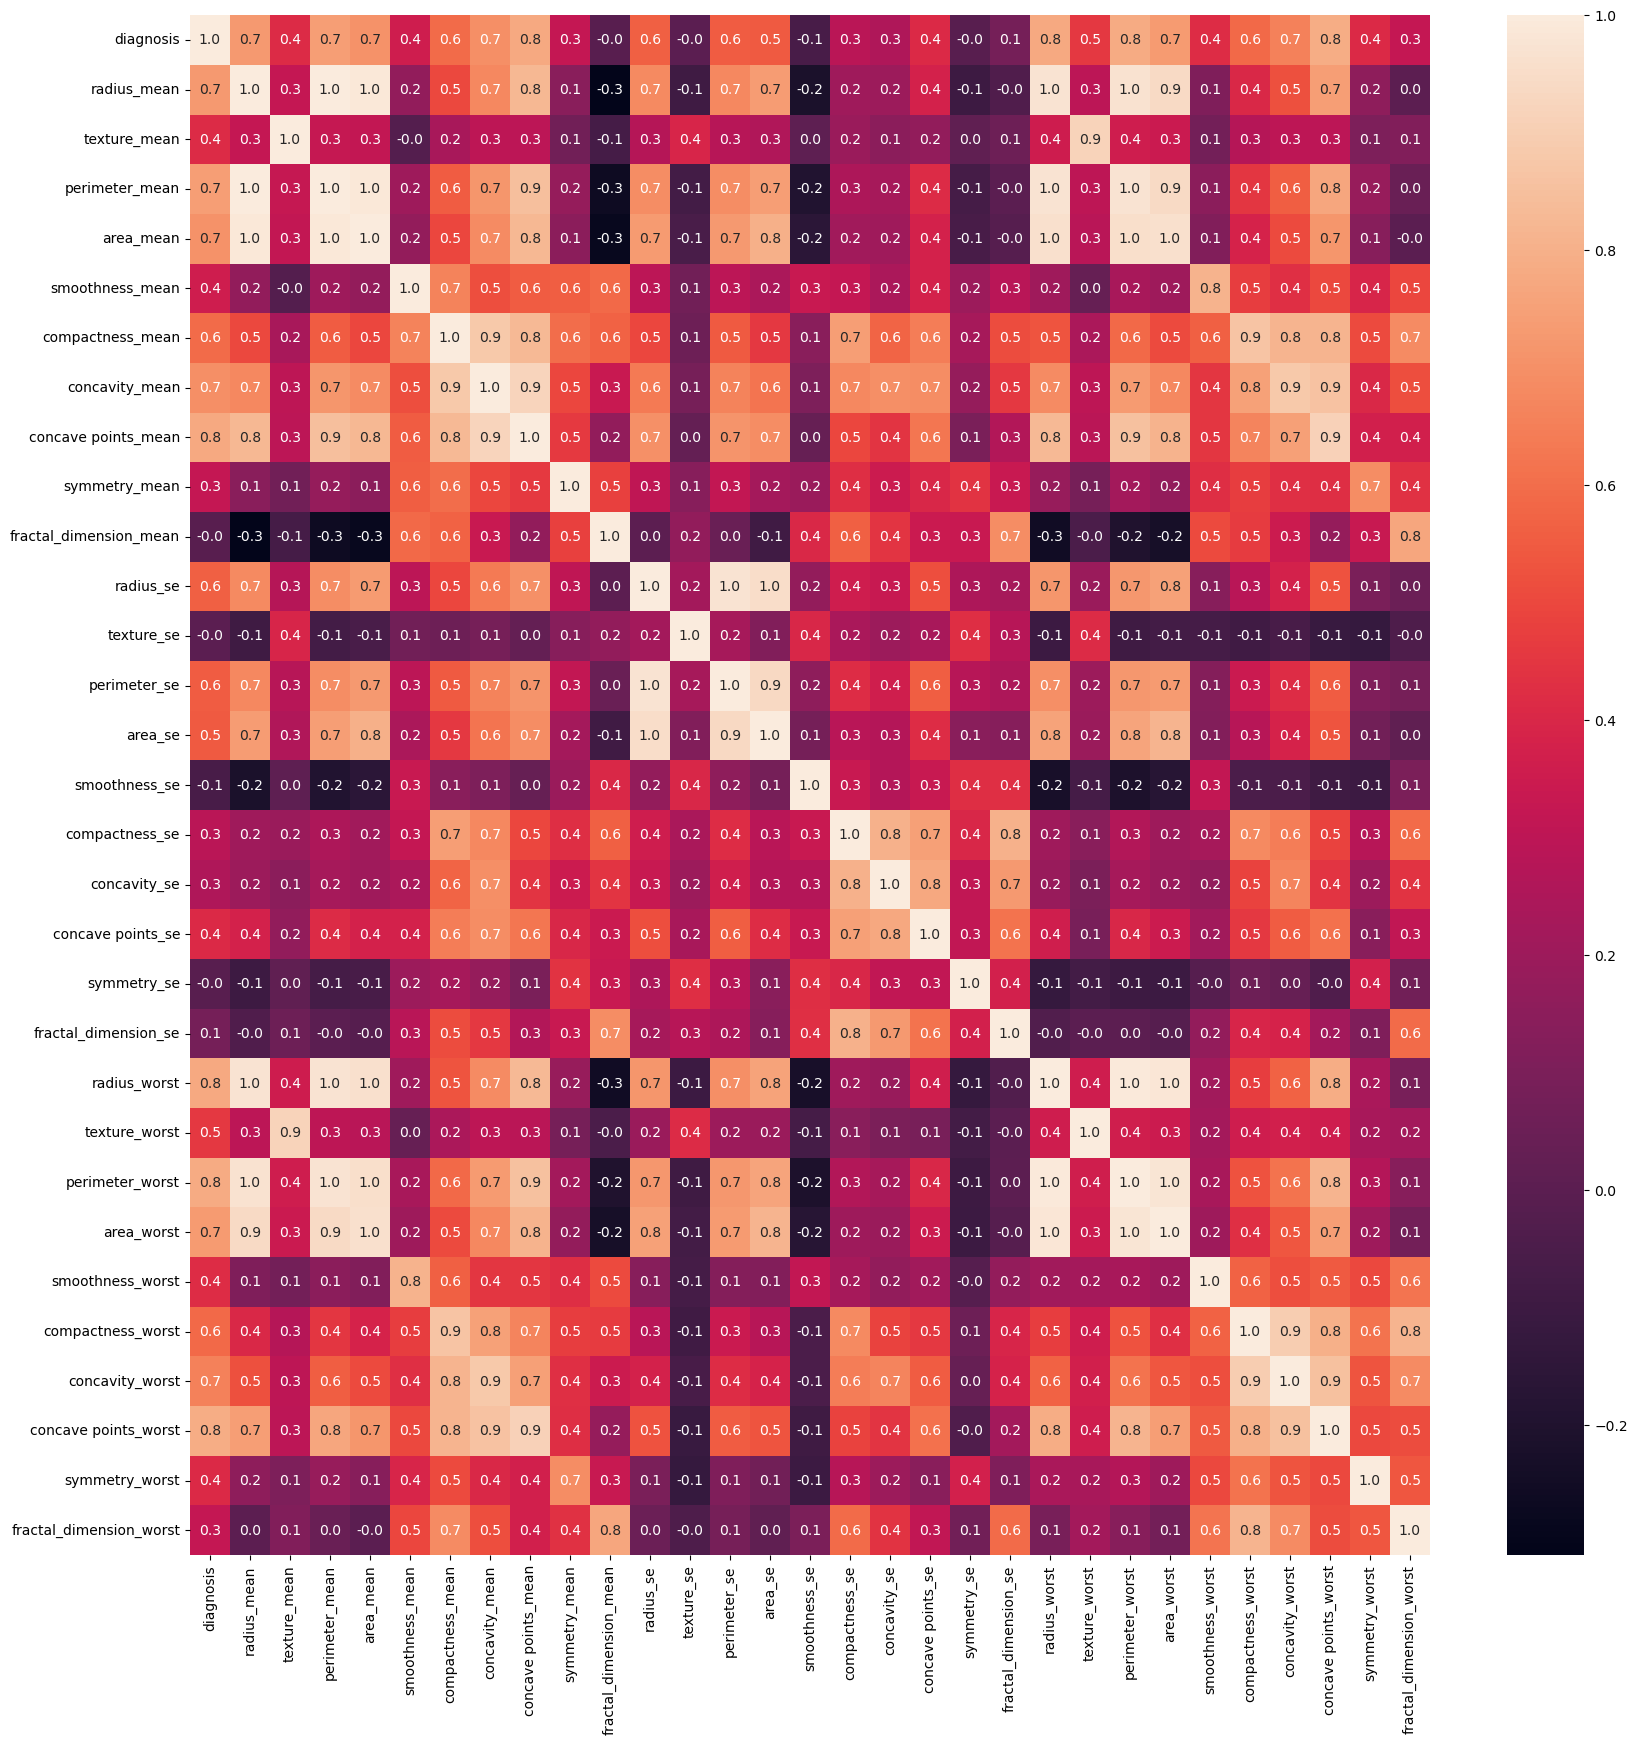

In [39]:
data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), fmt='.1f',annot=True)

# We can remove the features if they have high +ve or -ve correlation between them

In [41]:
# we have multicolinearity so we do variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif_data = pd.DataFrame()
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [VIF(data.values, i)for i in range(len(data.columns))]

vif_data.sort_values(by=["VIF"],ascending=False)

,feature,VIF
1,radius_mean,63015.026424
3,perimeter_mean,57444.072940
21,radius_worst,9788.244990
23,perimeter_worst,4596.349510
4,area_mean,1292.983917
24,area_worst,1146.210229
10,fractal_dimension_mean,652.039927
30,fractal_dimension_worst,425.910003
5,smoothness_mean,393.035825
25,smoothness_worst,375.325048


In [42]:
#Break up columns into groups, according to their suffix designation
df_diag=data.loc[:,["diagnosis"]]
df_mean=data.iloc[:,1:11]
df_se=data.iloc[:,11:21]
df_worst=data.iloc[:,21:]

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>],
       [<AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>],
       [<AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

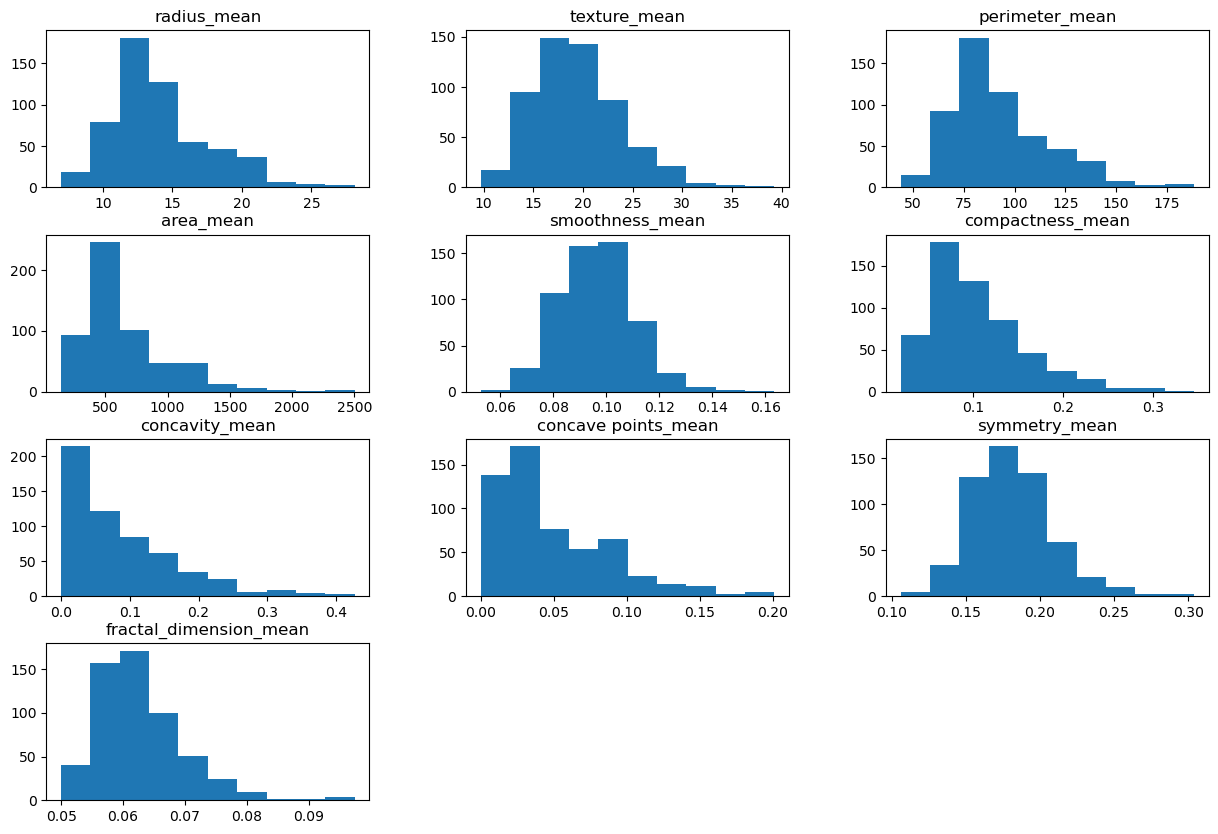

In [43]:
df_mean.hist(bins=10, figsize=(15, 10),grid=False)

array([[<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>],
       [<AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>],
       [<AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concave points_se'}>,
        <AxesSubplot:title={'center':'symmetry_se'}>],
       [<AxesSubplot:title={'center':'fractal_dimension_se'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

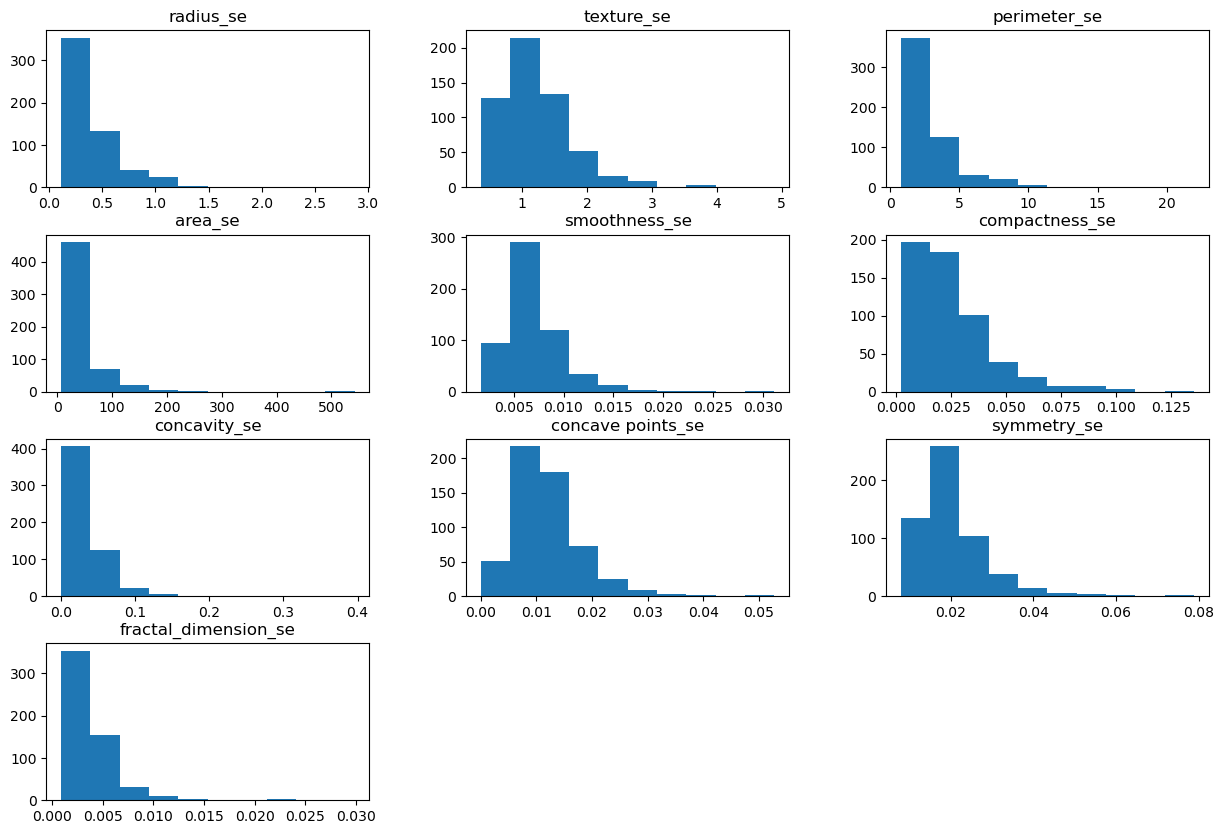

In [44]:
df_se.hist(bins=10, figsize=(15, 10),grid=False)

array([[<AxesSubplot:title={'center':'radius_worst'}>,
        <AxesSubplot:title={'center':'texture_worst'}>,
        <AxesSubplot:title={'center':'perimeter_worst'}>],
       [<AxesSubplot:title={'center':'area_worst'}>,
        <AxesSubplot:title={'center':'smoothness_worst'}>,
        <AxesSubplot:title={'center':'compactness_worst'}>],
       [<AxesSubplot:title={'center':'concavity_worst'}>,
        <AxesSubplot:title={'center':'concave points_worst'}>,
        <AxesSubplot:title={'center':'symmetry_worst'}>],
       [<AxesSubplot:title={'center':'fractal_dimension_worst'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

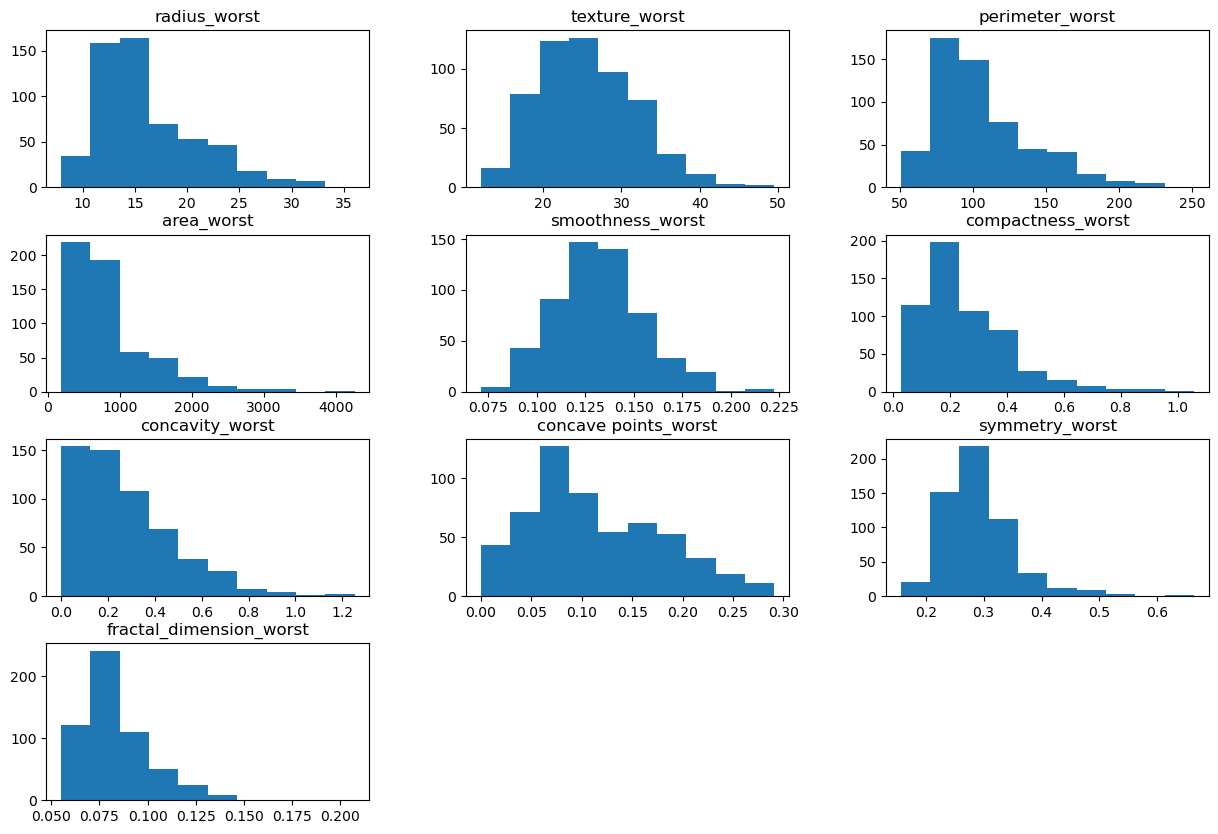

In [45]:
df_worst.hist(bins=10, figsize=(15, 10),grid=False)

# Most of the features are right skewed

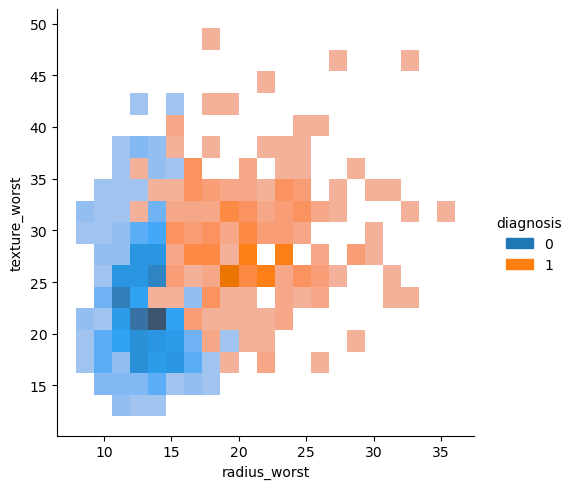

In [46]:
sns.displot(data =data,x = 'radius_worst',y ='texture_worst', hue = 'diagnosis',kind='hist')

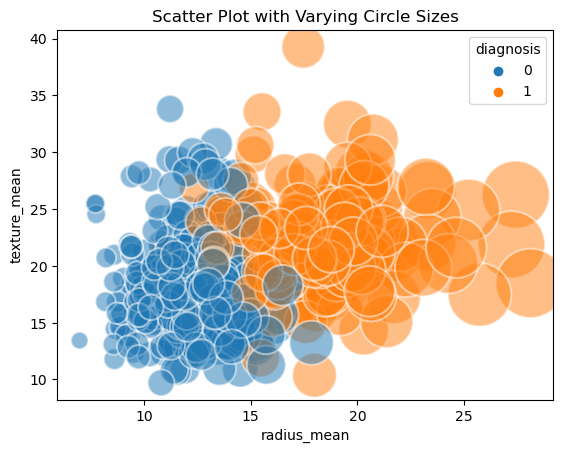

In [47]:
import math

sizes = data['radius_mean'].apply(lambda x : math.pi*(x*x))

# Create a scatter plot with varying circle sizes
sns.scatterplot(x=data['radius_mean'],y=data['texture_mean'] , hue=data['diagnosis'], s=sizes, alpha=0.5)

# Set the title and labels
plt.title("Scatter Plot with Varying Circle Sizes")
plt.xlabel("radius_mean")
plt.ylabel('texture_mean')

# Display the plot
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

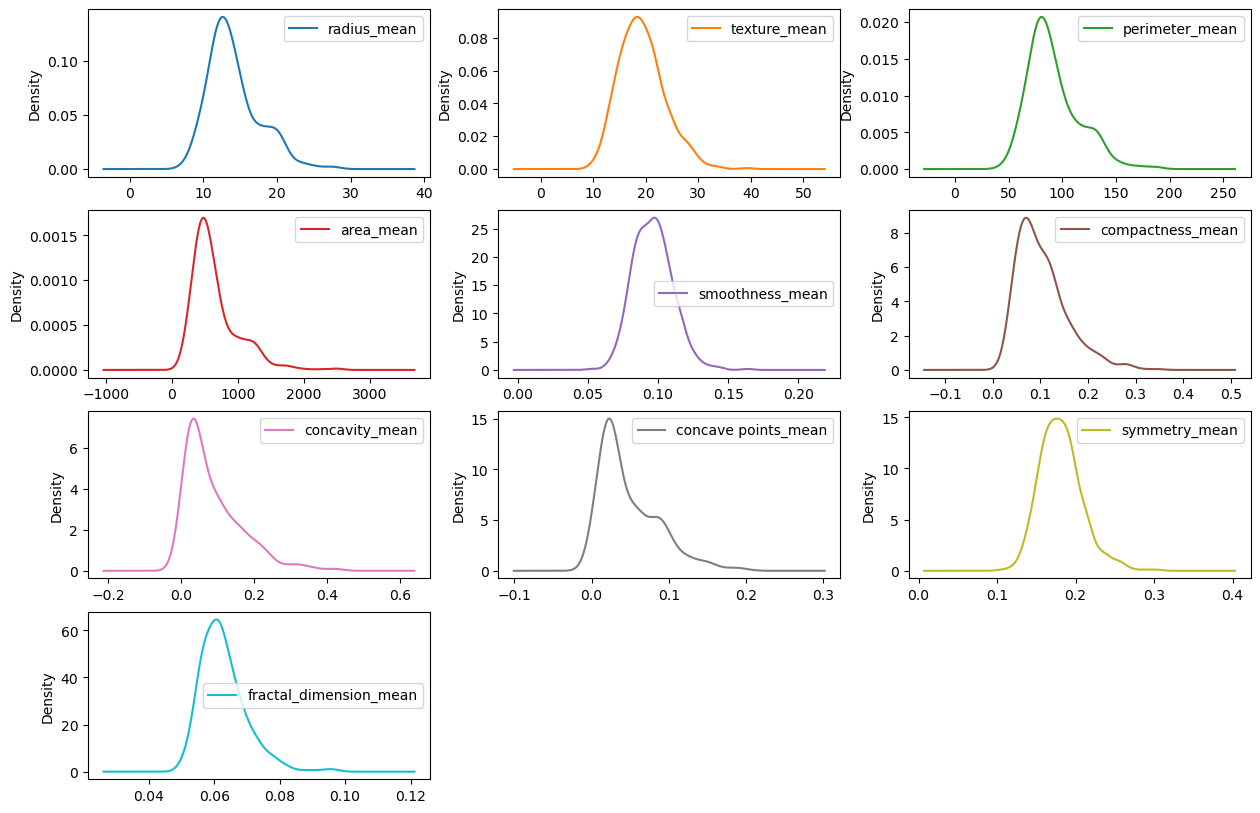

In [48]:
#Density Plots
df_mean.plot(kind= 'density', subplots=True,figsize=(15, 10), layout=(4,3),sharex=False,sharey=False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

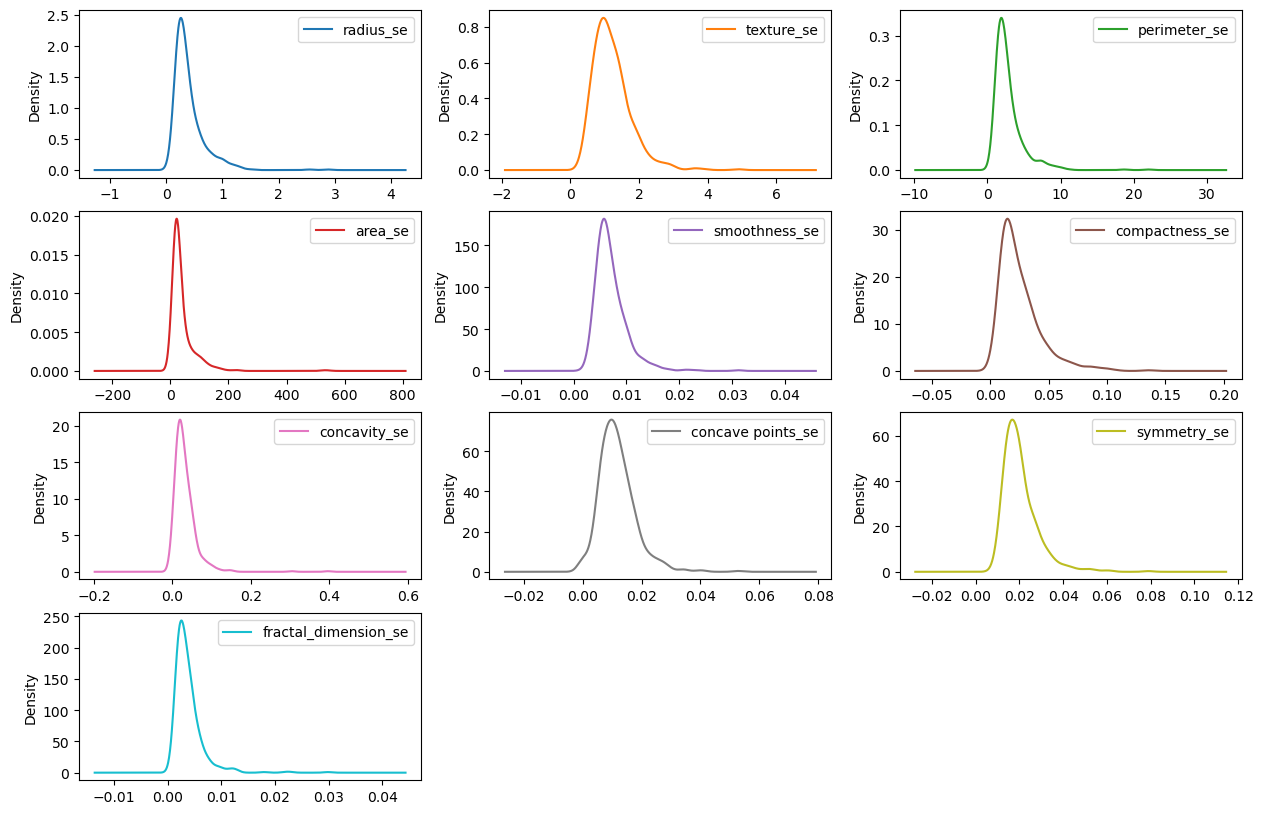

In [49]:
#Density Plots
df_se.plot(kind= 'density', subplots=True, figsize=(15, 10),layout=(4,3),sharex=False,sharey=False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

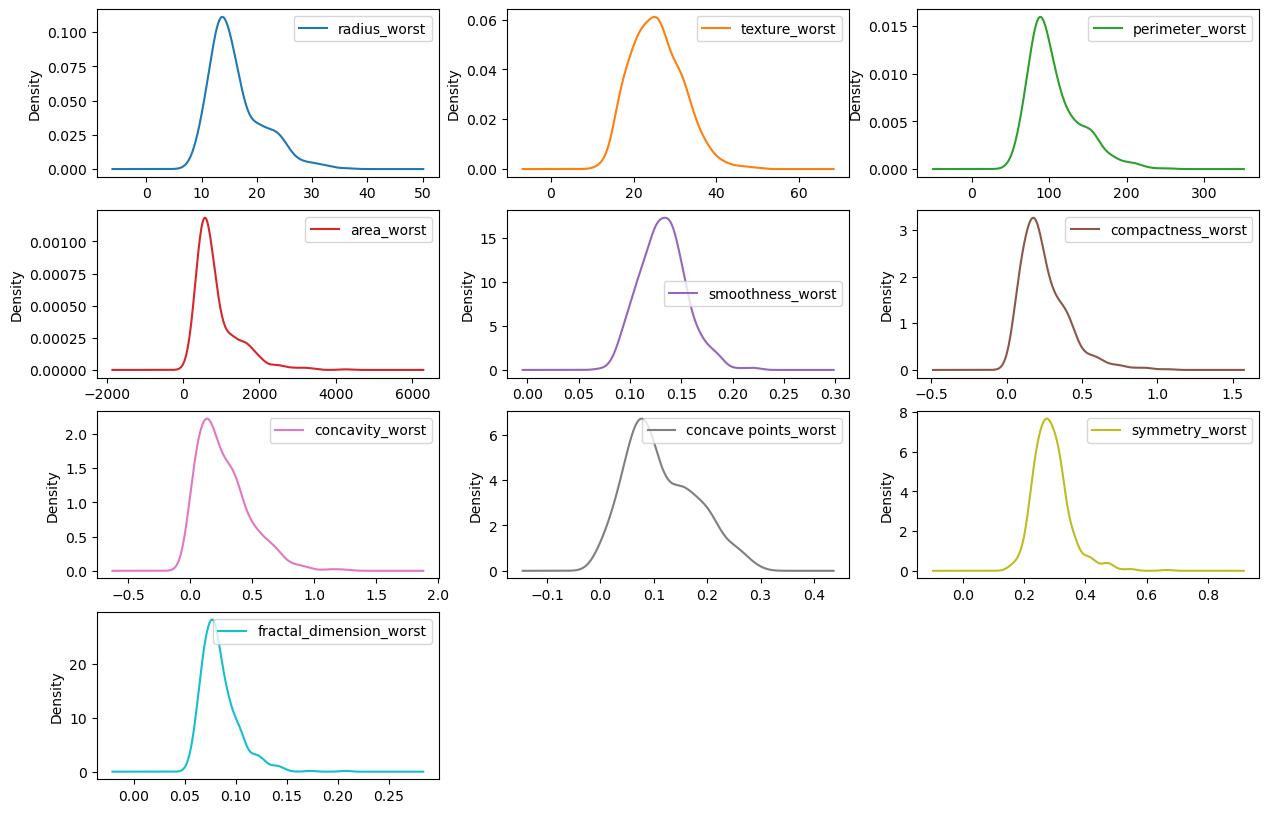

In [50]:
#Density Plots
df_worst.plot(kind= 'density', subplots=True, figsize=(15, 10),layout=(4,3),sharex=False,sharey=False)

# outlier detection

radius_mean                  AxesSubplot(0.125,0.712609;0.168478x0.167391)
texture_mean              AxesSubplot(0.327174,0.712609;0.168478x0.167391)
perimeter_mean            AxesSubplot(0.529348,0.712609;0.168478x0.167391)
area_mean                 AxesSubplot(0.731522,0.712609;0.168478x0.167391)
smoothness_mean              AxesSubplot(0.125,0.511739;0.168478x0.167391)
compactness_mean          AxesSubplot(0.327174,0.511739;0.168478x0.167391)
concavity_mean            AxesSubplot(0.529348,0.511739;0.168478x0.167391)
concave points_mean       AxesSubplot(0.731522,0.511739;0.168478x0.167391)
symmetry_mean                 AxesSubplot(0.125,0.31087;0.168478x0.167391)
fractal_dimension_mean     AxesSubplot(0.327174,0.31087;0.168478x0.167391)
dtype: object

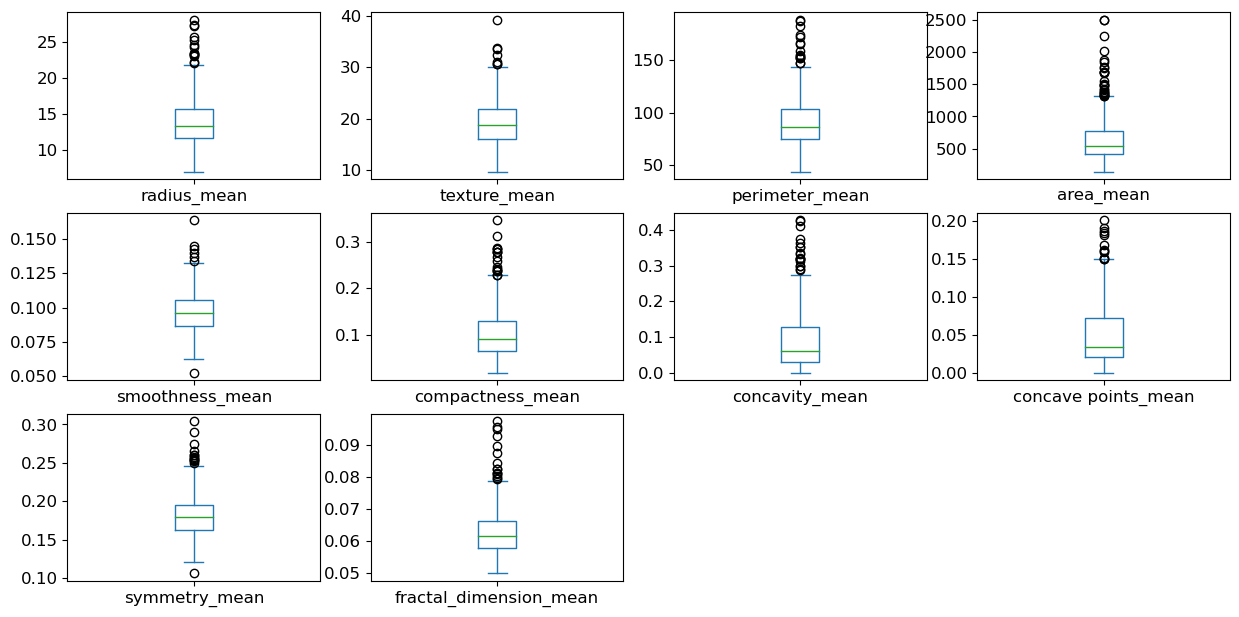

In [51]:
# box and whisker plots
df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), figsize=(15, 10),sharex=False, sharey=False,fontsize=12)

radius_se                  AxesSubplot(0.125,0.712609;0.168478x0.167391)
texture_se              AxesSubplot(0.327174,0.712609;0.168478x0.167391)
perimeter_se            AxesSubplot(0.529348,0.712609;0.168478x0.167391)
area_se                 AxesSubplot(0.731522,0.712609;0.168478x0.167391)
smoothness_se              AxesSubplot(0.125,0.511739;0.168478x0.167391)
compactness_se          AxesSubplot(0.327174,0.511739;0.168478x0.167391)
concavity_se            AxesSubplot(0.529348,0.511739;0.168478x0.167391)
concave points_se       AxesSubplot(0.731522,0.511739;0.168478x0.167391)
symmetry_se                 AxesSubplot(0.125,0.31087;0.168478x0.167391)
fractal_dimension_se     AxesSubplot(0.327174,0.31087;0.168478x0.167391)
dtype: object

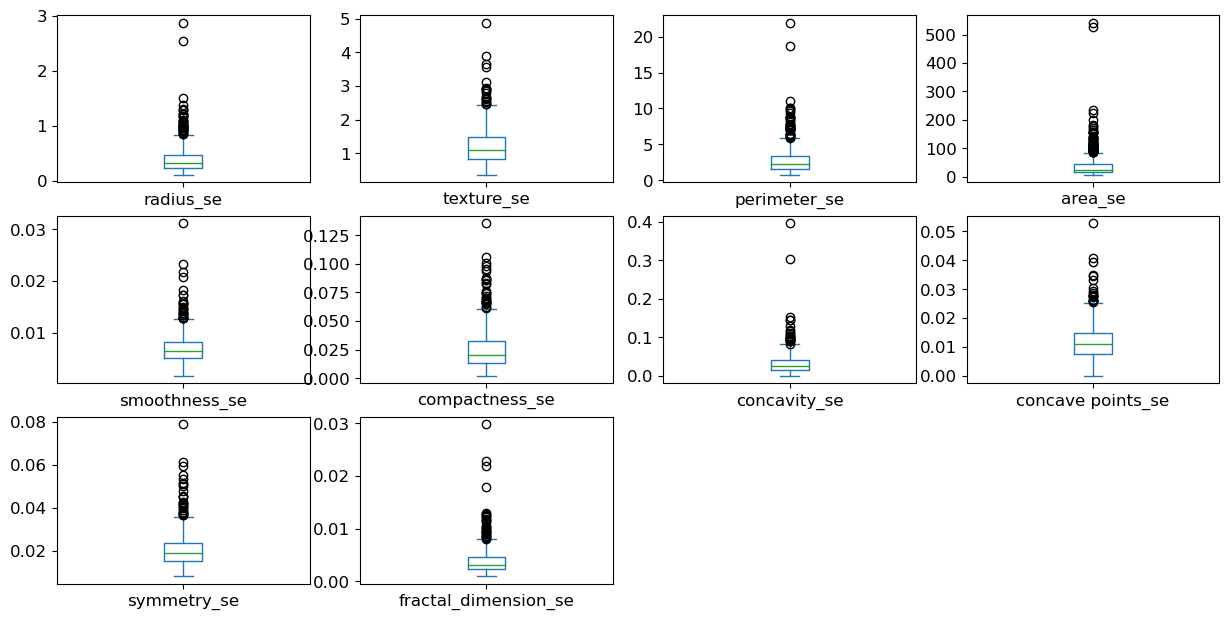

In [52]:
# box and whisker plots
df_se.plot(kind= 'box' , subplots=True, layout=(4,4), figsize=(15, 10),sharex=False, sharey=False,fontsize=12)

radius_worst                  AxesSubplot(0.125,0.712609;0.168478x0.167391)
texture_worst              AxesSubplot(0.327174,0.712609;0.168478x0.167391)
perimeter_worst            AxesSubplot(0.529348,0.712609;0.168478x0.167391)
area_worst                 AxesSubplot(0.731522,0.712609;0.168478x0.167391)
smoothness_worst              AxesSubplot(0.125,0.511739;0.168478x0.167391)
compactness_worst          AxesSubplot(0.327174,0.511739;0.168478x0.167391)
concavity_worst            AxesSubplot(0.529348,0.511739;0.168478x0.167391)
concave points_worst       AxesSubplot(0.731522,0.511739;0.168478x0.167391)
symmetry_worst                 AxesSubplot(0.125,0.31087;0.168478x0.167391)
fractal_dimension_worst     AxesSubplot(0.327174,0.31087;0.168478x0.167391)
dtype: object

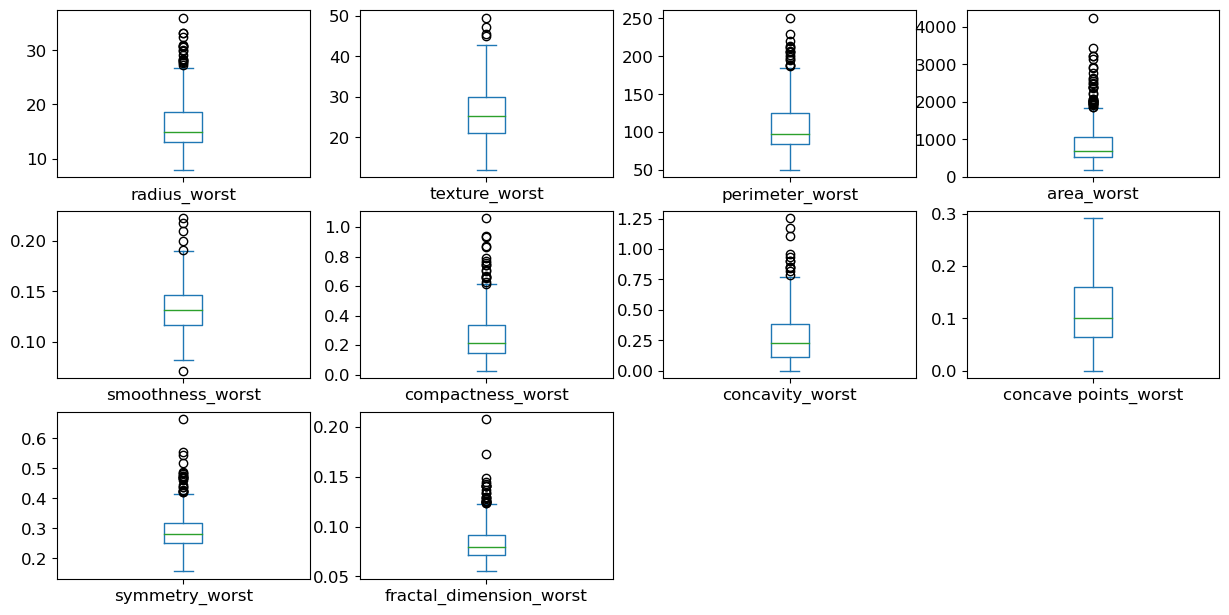

In [53]:
# box and whisker plots
df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), figsize=(15, 10),sharex=False, sharey=False,fontsize=12)

In [156]:
X1 = data.drop(['area_worst','radius_worst','area_mean','radius_mean','perimeter_worst','perimeter_mean','fractal_dimension_mean','fractal_dimension_worst','smoothness_mean','smoothness_worst','diagnosis'], axis=1)
# features are removed using vif

In [157]:
# seperating the features and target 
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [158]:
# SIGHTLY UN BALANCED DATA SET SO OVERSAMPLING IT
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X1, y)

In [159]:
X_over.shape

(706, 20)

In [160]:
scaler = StandardScaler()

# Perform feature scaling on log-transformed features
X_scaled = scaler.fit_transform(X_over)

# TRAIN TEST SPLIT

In [161]:
# Divide in train and validation
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_over , test_size = 0.3, random_state = 1, stratify = y_over)

In [144]:
 y_train.value_counts(),y_test.value_counts()

(1    247
 0    247
 Name: diagnosis, dtype: int64,
 1    106
 0    106
 Name: diagnosis, dtype: int64)

In [162]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# Create an SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model to the training data
best_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Make predictions on the train data 
T_pred = best_model.predict(x_train)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
Train_accuracy = accuracy_score(y_train, T_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred)
y_scores = best_model.decision_function(x_test)
auc_roc = roc_auc_score(y_test, y_scores)

print("Best Parameters:", best_params)
print("training Accuracy:", Train_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC-ROC:", auc_roc)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
training Accuracy: 0.9979757085020243
Accuracy: 0.9716981132075472
Precision: 0.9629629629629629
Recall: 0.9811320754716981
F1 Score: 0.9719626168224299
Sensitivity: 0.9811320754716981
Specificity: 0.9622641509433962
AUC-ROC: 0.9967070131719473


In [146]:
confusion_matrix(y_test, y_pred)

array([[102,   4],
       [  3, 103]], dtype=int64)

In [148]:
# Modelling
rf = rfc()
rf.fit(x_train, y_train)

pred = rf.predict(x_test)
T_pred = rf.predict(x_train)

Train_accuracy = accuracy_score(y_train, T_pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)
                            
print("training Accuracy:", Train_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

training Accuracy: 1.0
Accuracy: 0.9575471698113207
Precision: 0.9619047619047619
F1 Score: 0.957345971563981


In [149]:
# Modelling

dt = dtc()
dt.fit(x_train, y_train)

pred = dt.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print(accuracy)

0.9433962264150944


In [150]:
sample = valdata.drop(['id','diagnosis','Unnamed: 32','area_worst','radius_worst','area_mean','radius_mean','perimeter_worst','perimeter_mean','fractal_dimension_mean','fractal_dimension_worst','smoothness_mean','smoothness_worst'],axis =1)

In [151]:
sample

,texture_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
198,22.49,0.14280,0.11140,0.067720,0.1767,0.4357,1.0730,3.833,54.22,0.005524,0.03698,0.027060,0.012210,0.01415,0.003397,32.06,0.5601,0.38650,0.17080,0.3193
162,18.15,0.16660,0.25080,0.128600,0.2027,0.7364,1.0480,4.792,97.07,0.004057,0.02277,0.040290,0.013030,0.01686,0.003318,26.39,0.3846,0.68100,0.22470,0.3643
70,21.31,0.10290,0.10800,0.079510,0.1582,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.022690,0.013700,0.01386,0.001698,26.58,0.2336,0.26870,0.17890,0.2551
393,22.28,0.20870,0.28100,0.156200,0.2162,0.6242,0.9209,4.158,80.99,0.005215,0.03726,0.047180,0.012880,0.02045,0.004028,28.74,0.5717,0.70530,0.24220,0.3828
56,18.57,0.12670,0.13230,0.089940,0.1917,0.7275,1.1930,4.837,102.50,0.006458,0.02306,0.029450,0.015380,0.01852,0.002608,28.14,0.3511,0.38790,0.20910,0.3537
136,16.67,0.06095,0.03592,0.026000,0.1339,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707,25.48,0.1028,0.10460,0.06968,0.1712
146,16.58,0.17000,0.16590,0.074150,0.2678,0.3197,1.4260,2.281,24.72,0.005427,0.03633,0.046490,0.018430,0.05628,0.004635,26.38,0.4092,0.45040,0.18650,0.5774
346,18.90,0.05794,0.00751,0.008488,0.1555,0.2430,1.1520,1.559,18.02,0.007180,0.01096,0.005832,0.005495,0.01982,0.002754,27.06,0.1352,0.04506,0.05093,0.2880
183,14.92,0.08155,0.06181,0.023610,0.1167,0.3344,1.1080,1.902,22.77,0.007356,0.03728,0.059150,0.017120,0.02165,0.004784,17.70,0.1610,0.16480,0.06296,0.1811
395,17.18,0.05361,0.02681,0.032510,0.1641,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444,25.34,0.1231,0.08460,0.07911,0.2523


In [152]:


# Perform feature scaling on log-transformed features
X_scaled = scaler.fit_transform(sample)

In [153]:
prediction = best_model.predict(X_scaled)

# Display the prediction
print("Prediction:", prediction)

Prediction: [1 1 1 1 1 0 1 0 0 0]


In [102]:
# prediction = rf.predict(X_scaled)

# # Display the prediction
# print("Prediction:", prediction)

Prediction: [1 1 1 1 1 0 0 0 0 0]


In [104]:
# prediction = dt.predict(X_scaled)

# # Display the prediction
# print("Prediction:", prediction)

Prediction: [1 1 1 1 1 0 0 0 0 0]


# SAVING THE MODEL

In [163]:
import pickle
filename = 'Breast_cancer_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [164]:
Breast_cancer_model = pickle.load(open('Breast_cancer_model.sav', 'rb'))

In [165]:
input_data = (22.49,0.14280,0.11140,0.067720,0.1767,0.4357,1.0730,3.833,54.22,0.005524,0.03698,0.027060,0.012210,0.01415,0.003397,32.06,0.5601,0.38650,0.17080,0.3193)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
X_scaled2 = scaler.transform(input_data_reshaped)

In [168]:
prediction = Breast_cancer_model.predict(X_scaled2)
print(prediction)
if (prediction[0] == 0):
  print('BENIGN IS NOT HARMFUL')
else:
  print('MALIGNANT IS HARMFUL')

[1]
MALIGNANT IS HARMFUL


In [ ]:
# Malignant(1) cases and lower for Benign(0)

In [172]:
X1.columns

Index(['texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')